In [1]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

class InterseccionVisualizacion:
    def __init__(self, model):
        self.model = model
        self.steps = []
        self.coches_totales = []
        self.coches_tranquilos = []
        self.coches_enojados = []
        self.coches_rapidos = []
        self.coches_lentos = []
        self.coches_desobedientes = []
        self.coches_obstructores = []
        self.coches_espera = []

    def recolectar_datos(self):
        self.steps.append(len(self.steps) + 1)
        coches = [agent for agent in self.model.schedule.agents if isinstance(agent, CocheNormal)]

        # Contadores de estados y tipos
        coches_tranquilos = sum(1 for coche in coches if coche.estado == "tranquilo")
        coches_enojados = sum(1 for coche in coches if coche.estado == "enojado")
        coches_rapidos = sum(1 for coche in coches if isinstance(coche, CocheRapido))
        coches_lentos = sum(1 for coche in coches if isinstance(coche, CocheLento))
        coches_desobedientes = sum(1 for coche in coches if isinstance(coche, CocheDesobediente))
        coches_obstructores = sum(1 for coche in coches if isinstance(coche, CocheObstructor))
        coches_espera = len(self.model.semaforo.vehiculos_en_espera)

        # Actualización de datos
        self.coches_totales.append(len(coches))
        self.coches_tranquilos.append(coches_tranquilos)
        self.coches_enojados.append(coches_enojados)
        self.coches_rapidos.append(coches_rapidos)
        self.coches_lentos.append(coches_lentos)
        self.coches_desobedientes.append(coches_desobedientes)
        self.coches_obstructores.append(coches_obstructores)
        self.coches_espera.append(coches_espera)

    def graficar(self):
        clear_output(wait=True)
        fig, axs = plt.subplots(3, 2, figsize=(15, 12))

        # Gráfico de coches totales
        axs[0, 0].plot(self.steps, self.coches_totales, label="Coches Totales")
        axs[0, 0].set_title("Número Total de Coches")
        axs[0, 0].set_xlabel("Pasos")
        axs[0, 0].set_ylabel("Coches")
        axs[0, 0].legend()

        # Gráfico de coches tranquilos vs enojados
        axs[0, 1].plot(self.steps, self.coches_tranquilos, label="Tranquilos", color="blue")
        axs[0, 1].plot(self.steps, self.coches_enojados, label="Enojados", color="orange")
        axs[0, 1].set_title("Estado de los Coches")
        axs[0, 1].set_xlabel("Pasos")
        axs[0, 1].set_ylabel("Coches")
        axs[0, 1].legend()

        # Gráfico de coches en espera en el semáforo
        axs[1, 0].plot(self.steps, self.coches_espera, label="Coches en Espera", color="green")
        axs[1, 0].set_title("Coches en Espera en el Semáforo")
        axs[1, 0].set_xlabel("Pasos")
        axs[1, 0].set_ylabel("Coches")
        axs[1, 0].legend()

        # Gráfico de coches por tipo
        axs[1, 1].plot(self.steps, self.coches_rapidos, label="Rápidos", color="red")
        axs[1, 1].plot(self.steps, self.coches_lentos, label="Lentos", color="purple")
        axs[1, 1].plot(self.steps, self.coches_desobedientes, label="Desobedientes", color="brown")
        axs[1, 1].plot(self.steps, self.coches_obstructores, label="Obstructores", color="black")
        axs[1, 1].set_title("Coches por Tipo")
        axs[1, 1].set_xlabel("Pasos")
        axs[1, 1].set_ylabel("Coches")
        axs[1, 1].legend()

        # Gráfico combinado de tipos de coches
        axs[2, 0].stackplot(
            self.steps,
            self.coches_rapidos,
            self.coches_lentos,
            self.coches_desobedientes,
            self.coches_obstructores,
            labels=["Rápidos", "Lentos", "Desobedientes", "Obstructores"],
            alpha=0.7
        )
        axs[2, 0].set_title("Distribución de Tipos de Coches")
        axs[2, 0].set_xlabel("Pasos")
        axs[2, 0].set_ylabel("Coches")
        axs[2, 0].legend()

        plt.tight_layout()
        plt.show()


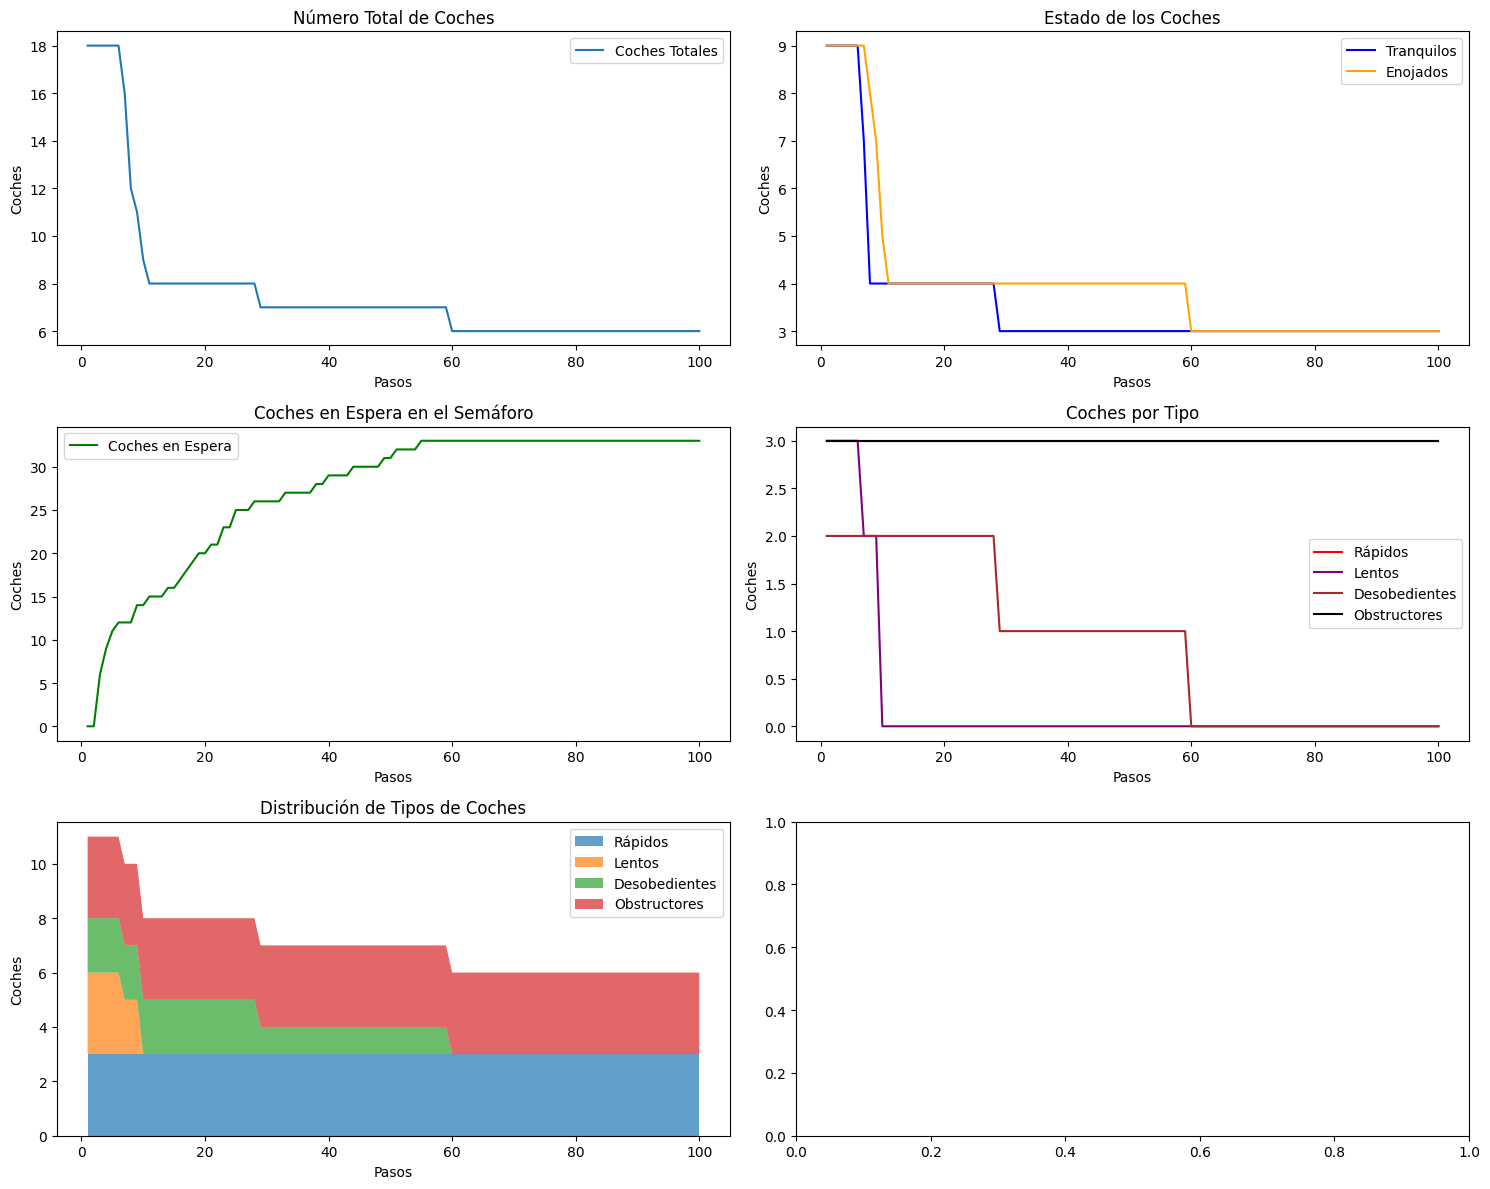

In [6]:
# Importa tu modelo
from intersection_model import CocheNormal, CocheRapido, CocheLento, CocheDesobediente, CocheObstructor, InterseccionModel

# Crea el modelo
# Crea el modelo especificando la cantidad de agentes de cada tipo
model = InterseccionModel(
    ancho=10,
    alto=10,
    num_normales=7,
    num_rapidos=3,
    num_lentos=3,
    num_desobedientes=2,
    num_obstructores=3
)

# Visualización de los datos
visualizacion = InterseccionVisualizacion(model)

for i in range(100):  # Simula 100 pasos
    model.step()
    visualizacion.recolectar_datos()
    visualizacion.graficar()

